In [1]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score
from math import sqrt
survey_dominant_emotion = pd.read_pickle("survey_dominant_emotion")
survey_dominant_emotion.tail()

,user_id,face_emo,perma,p,e,r,m,a,p_emo,n_emo,gender
142,703978203,HAPPY,6.0625,6.666667,6.000000,6.000000,5.333333,6.000000,6.666667,5.000000,Female
143,7410944,HAPPY,7.8750,8.000000,6.000000,9.333333,8.666667,7.000000,8.000000,6.000000,Female
144,8854187,HAPPY,6.6875,6.666667,8.333333,7.000000,8.000000,3.333333,6.666667,8.000000,Female
145,898090810,HAPPY,8.3125,7.333333,9.333333,9.000000,7.666667,8.333333,7.333333,4.333333,Female
146,9931123,HAPPY,6.9375,6.333333,6.666667,6.000000,7.000000,8.666667,6.333333,5.333333,Female


In [2]:
survey_dominant_emotion = survey_dominant_emotion.dropna()
survey_dominant_emotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 146
Data columns (total 11 columns):
user_id     146 non-null int64
face_emo    146 non-null object
perma       146 non-null float64
p           146 non-null float64
e           146 non-null float64
r           146 non-null float64
m           146 non-null float64
a           146 non-null float64
p_emo       146 non-null float64
n_emo       146 non-null float64
gender      146 non-null category
dtypes: category(1), float64(8), int64(1), object(1)
memory usage: 12.7+ KB


In [3]:
df = pd.get_dummies(survey_dominant_emotion, columns=['face_emo', 'gender'])
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns = df.columns.str.replace('.', '_').str.lower()
df.columns = df.columns.str.replace('&', '').str.lower()
df.columns = df.columns.str.replace('(', '').str.lower()
df.columns = df.columns.str.replace(')', '').str.lower()
df.columns = df.columns.str.replace('__', '_').str.lower()
df.columns = df.columns.str.replace('__', '_').str.lower()

In [4]:
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,user_id,perma,p,e,r,m,a,p_emo,n_emo,face_emo_angry,face_emo_confused,face_emo_happy,face_emo_sad,face_emo_surprised,gender_female,gender_male
user_id,1,0.00507055,0.032355,0.0209633,-0.0554421,0.0033826,0.0376282,0.032355,-0.0799507,0.0731572,0.0689306,-0.217812,0.201983,0.124915,-0.1044,0.1044
perma,0.00507055,1,0.89348,0.672716,0.836149,0.89353,0.824528,0.89348,-0.532762,0.0554651,0.116843,-0.122128,0.0379639,0.0276384,-0.0119016,0.0119016
p,0.032355,0.89348,1,0.479664,0.730055,0.754912,0.663223,1,-0.561078,0.017002,0.160303,-0.0794485,-0.0500061,0.00997937,-0.0754419,0.0754419
e,0.0209633,0.672716,0.479664,1,0.389269,0.508498,0.560872,0.479664,-0.130354,-0.000469276,0.0274917,-0.0419295,0.0782969,-0.000381829,0.117935,-0.117935
r,-0.0554421,0.836149,0.730055,0.389269,1,0.690446,0.54581,0.730055,-0.501853,0.0668934,0.0648842,-0.132559,0.0530895,0.0753401,-0.00822063,0.00822063
m,0.0033826,0.89353,0.754912,0.508498,0.690446,1,0.714486,0.754912,-0.479529,0.0596223,0.146581,-0.1492,0.0341847,0.0485121,-0.0525859,0.0525859
a,0.0376282,0.824528,0.663223,0.560872,0.54581,0.714486,1,0.663223,-0.45657,0.0630674,0.0856036,-0.0895139,0.0603218,-0.0301198,0.00390182,-0.00390182
p_emo,0.032355,0.89348,1,0.479664,0.730055,0.754912,0.663223,1,-0.561078,0.017002,0.160303,-0.0794485,-0.0500061,0.00997937,-0.0754419,0.0754419
n_emo,-0.0799507,-0.532762,-0.561078,-0.130354,-0.501853,-0.479529,-0.45657,-0.561078,1,-0.0128368,0.0246479,0.037633,-0.0298405,-0.0614885,0.261531,-0.261531
face_emo_angry,0.0731572,0.0554651,0.017002,-0.000469276,0.0668934,0.0596223,0.0630674,0.017002,-0.0128368,1,-0.0170697,-0.601571,-0.0120284,-0.0170697,-0.112436,0.112436


In [103]:
y = df['p'].values.reshape(-1,1)
X = df['face_emo_angry'].values.reshape(-1,1)

In [101]:
lm = LinearRegression()
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
lm = LinearRegression()

# Fit the regressor to the training data
lm.fit(X_train, y_train)
print('Estimated intercept coefficient:', lm.intercept_)

# Predict on the test data: y_pred
y_pred = lm.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(lm.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print(f'alpha = {lm.intercept_}')
print(f'betas = {lm.coef_}')

Estimated intercept coefficient: [6.9480198]
R^2: -0.0086849642576734
Root Mean Squared Error: 1.481581882761446
alpha = [6.9480198]
betas = [[-0.2605198]]


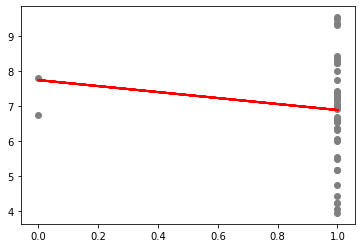

In [76]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [77]:
import seaborn as seabornInstance 

In [14]:
y = df['perma'].values.reshape(-1,1)
X = df[['face_emo_happy', 'face_emo_sad', 'face_emo_confused', 'face_emo_angry', 'face_emo_surprised']]
lm = LinearRegression()

In [12]:
lm.fit(X, y)
#print the intercept and number of coefficients.
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: [7.49257246]
Number of coefficients: 1


In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
lm = LinearRegression()

# Fit the regressor to the training data
lm.fit(X_train, y_train)
print('Estimated intercept coefficient:', lm.intercept_)

# Predict on the test data: y_pred
y_pred = lm.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(lm.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print(f'alpha = {lm.intercept_}')
print(f'betas = {lm.coef_}')